In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


first test 

using normal model ( Random Forest )
and checking the feature extracted accuracy 



In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, TensorDataset


In [3]:
trainData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")

In [4]:
unique_genres = trainData['Genre'].unique()
print("Unique Genres:")
for idx, genre in enumerate(unique_genres, start=1):
    print(f"{idx}. {genre}")

Unique Genres:
1. AFROHOUSE
2. AMBIENT
3. BASSHOUSE
4. BIGROOM
5. BREAKBEAT
6. DRUMANDBASS
7. DUBSTEP
8. ELECTROPOP
9. FUTUREBASS
10. FUTUREHOUSE
11. HARDSTYLE
12. JACKINHOUSE
13. MELODICDUBSTEP
14. PHONK
15. PROGRESSIVEHOUSE
16. PSY-TRANCE
17. REGGAETON
18. TRANCE
19. TRAP
20. TROPICALHOUSE


In [5]:
trainData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
testData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")



xtrain = trainData.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
ytrain = trainData['Genre']
xtest = testData.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
ytest = testData['Genre']




label_encoder = LabelEncoder()
ytrain = label_encoder.fit_transform(ytrain)
ytest = label_encoder.transform(ytest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, ytrain)




ypredict = model.predict(X_test_scaled)


accuracy = accuracy_score(ytest, ypredict)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(ytest, ypredict, target_names=label_encoder.classes_))


Accuracy on test set: 0.4963

Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.61      0.70      0.65        40
         AMBIENT       0.69      0.93      0.79        40
       BASSHOUSE       0.37      0.38      0.37        40
         BIGROOM       0.51      0.62      0.56        40
       BREAKBEAT       0.81      0.95      0.87        40
     DRUMANDBASS       0.42      0.20      0.27        40
         DUBSTEP       0.76      0.80      0.78        40
      ELECTROPOP       0.33      0.25      0.29        40
      FUTUREBASS       0.28      0.35      0.31        40
     FUTUREHOUSE       0.37      0.17      0.24        40
       HARDSTYLE       0.58      0.35      0.44        40
     JACKINHOUSE       0.54      0.53      0.53        40
  MELODICDUBSTEP       0.13      0.15      0.14        40
           PHONK       0.48      0.35      0.41        40
PROGRESSIVEHOUSE       0.65      0.80      0.72        40
      PSY-TRANCE  

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, ytrain)
    ypredict = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(ytest, ypredict)
    print(f"{model_name} Accuracy on test set: {accuracy:.4f}")
    print(f"\n{model_name} Classification Report:")
    print(classification_report(ytest, ypredict, target_names=label_encoder.classes_))
    print('-' * 50)


Random Forest Accuracy on test set: 0.4963

Random Forest Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.61      0.70      0.65        40
         AMBIENT       0.69      0.93      0.79        40
       BASSHOUSE       0.37      0.38      0.37        40
         BIGROOM       0.51      0.62      0.56        40
       BREAKBEAT       0.81      0.95      0.87        40
     DRUMANDBASS       0.42      0.20      0.27        40
         DUBSTEP       0.76      0.80      0.78        40
      ELECTROPOP       0.33      0.25      0.29        40
      FUTUREBASS       0.28      0.35      0.31        40
     FUTUREHOUSE       0.37      0.17      0.24        40
       HARDSTYLE       0.58      0.35      0.44        40
     JACKINHOUSE       0.54      0.53      0.53        40
  MELODICDUBSTEP       0.13      0.15      0.14        40
           PHONK       0.48      0.35      0.41        40
PROGRESSIVEHOUSE       0.65      0.80      0.72 

c:\Users\ashut\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on test set: 0.5150

XGBoost Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.72      0.65      0.68        40
         AMBIENT       0.65      0.75      0.70        40
       BASSHOUSE       0.37      0.42      0.40        40
         BIGROOM       0.52      0.57      0.55        40
       BREAKBEAT       0.78      0.90      0.84        40
     DRUMANDBASS       0.40      0.25      0.31        40
         DUBSTEP       0.69      0.85      0.76        40
      ELECTROPOP       0.35      0.33      0.34        40
      FUTUREBASS       0.25      0.35      0.29        40
     FUTUREHOUSE       0.31      0.20      0.24        40
       HARDSTYLE       0.76      0.33      0.46        40
     JACKINHOUSE       0.56      0.55      0.56        40
  MELODICDUBSTEP       0.23      0.35      0.27        40
           PHONK       0.60      0.65      0.63        40
PROGRESSIVEHOUSE       0.61      0.68      0.64        40
  

Accuracy on test set: 0.5150

Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.72      0.65      0.68        40
         AMBIENT       0.65      0.75      0.70        40
       BASSHOUSE       0.37      0.42      0.40        40
         BIGROOM       0.52      0.57      0.55        40
       BREAKBEAT       0.78      0.90      0.84        40
     DRUMANDBASS       0.40      0.25      0.31        40
         DUBSTEP       0.69      0.85      0.76        40
      ELECTROPOP       0.35      0.33      0.34        40
      FUTUREBASS       0.25      0.35      0.29        40
     FUTUREHOUSE       0.31      0.20      0.24        40
       HARDSTYLE       0.76      0.33      0.46        40
     JACKINHOUSE       0.56      0.55      0.56        40
  MELODICDUBSTEP       0.23      0.35      0.27        40
           PHONK       0.60      0.65      0.63        40
PROGRESSIVEHOUSE       0.61      0.68      0.64        40
      PSY-TRANCE  

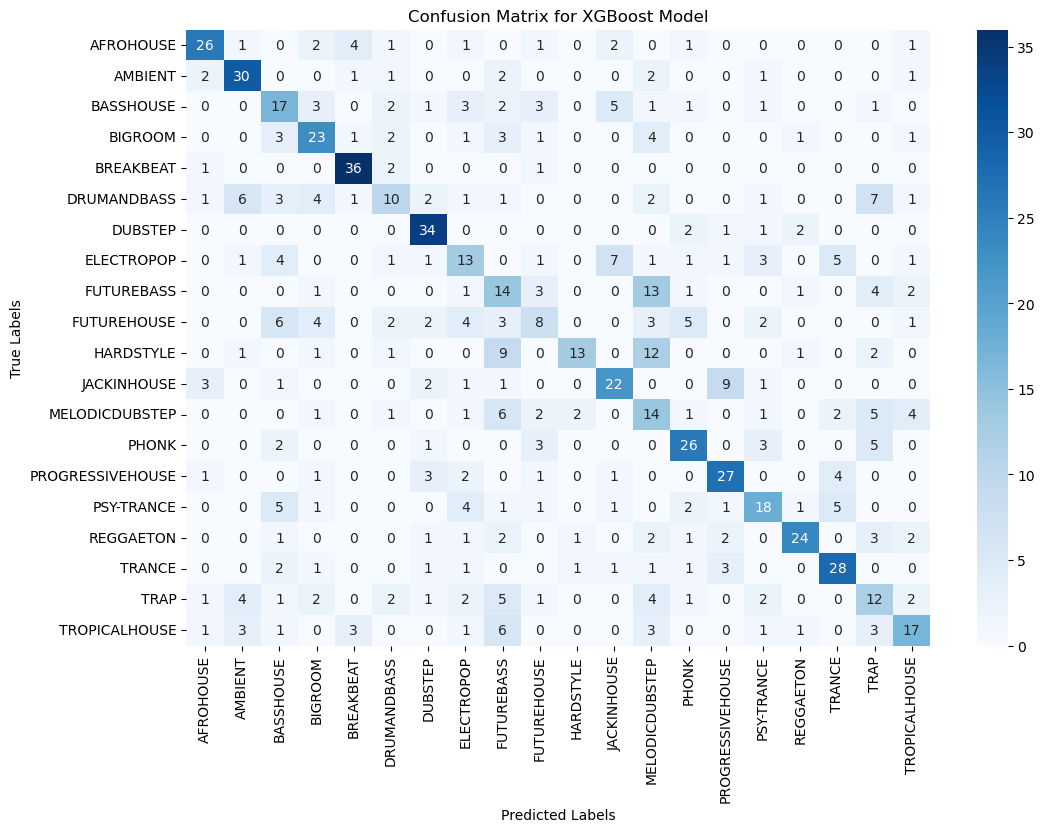

In [14]:
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, ytrain)

ypredict = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(ytest, ypredict)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(ytest, ypredict, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypredict)

# Plotting confusion matrix with seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#percentages
model_accuracies_percent = {model_name: acc * 100 for model_name, acc in model_accuracies.items()}


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(model_accuracies_percent.keys()), y=list(model_accuracies_percent.values()), palette='coolwarm', edgecolor='black')

#percentage on bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.title('Comparison of Model Accuracy (%)', fontsize=16, weight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


NameError: name 'model_accuracies' is not defined

MODULES

In [12]:
# import numpy as np
import torch
import torch.nn as nn

# class Conv_1d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
#         super(Conv_1d, self).__init__()
#         self.conv = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn = nn.BatchNorm1d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool1d(pooling)
#     def forward(self, x):
#         out = self.mp(self.relu(self.bn(self.conv(x))))
#         return out


# class Conv_2d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
#         super(Conv_2d, self).__init__()
#         self.conv = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool2d(pooling)
#     def forward(self, x):
#         out = self.mp(self.relu(self.bn(self.conv(x))))
#         return out


class Res_2d(nn.Module):
    def __init__(self, input_channels, output_channels, shape=3, stride=2):
        super(Res_2d, self).__init__()
        # convolution
        self.conv_1 = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
        self.bn_1 = nn.BatchNorm2d(output_channels)
        self.conv_2 = nn.Conv2d(output_channels, output_channels, shape, padding=shape//2)
        self.bn_2 = nn.BatchNorm2d(output_channels)

        # residual
        self.diff = False
        if (stride != 1) or (input_channels != output_channels):
            self.conv_3 = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
            self.bn_3 = nn.BatchNorm2d(output_channels)
            self.diff = True
        self.relu = nn.ReLU()

    def forward(self, x):
        # convolution
        out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))

        # residual
        if self.diff:
            x = self.bn_3(self.conv_3(x))
        out = x + out
        out = self.relu(out)
        return out


# class Res_2d_mp(nn.Module):
#     def __init__(self, input_channels, output_channels, pooling=2):
#         super(Res_2d_mp, self).__init__()
#         self.conv_1 = nn.Conv2d(input_channels, output_channels, 3, padding=1)
#         self.bn_1 = nn.BatchNorm2d(output_channels)
#         self.conv_2 = nn.Conv2d(output_channels, output_channels, 3, padding=1)
#         self.bn_2 = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool2d(pooling)
#     def forward(self, x):
#         out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))
#         out = x + out
#         out = self.mp(self.relu(out))
#         return out


# class ResSE_1d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=3):
#         super(ResSE_1d, self).__init__()
#         # convolution
#         self.conv_1 = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn_1 = nn.BatchNorm1d(output_channels)
#         self.conv_2 = nn.Conv1d(output_channels, output_channels, shape, padding=shape//2)
#         self.bn_2 = nn.BatchNorm1d(output_channels)

#         # squeeze & excitation
#         self.dense1 = nn.Linear(output_channels, output_channels)
#         self.dense2 = nn.Linear(output_channels, output_channels)

#         # residual
#         self.diff = False
#         if (stride != 1) or (input_channels != output_channels):
#             self.conv_3 = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#             self.bn_3 = nn.BatchNorm1d(output_channels)
#             self.diff = True
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.mp = nn.MaxPool1d(pooling)

#     def forward(self, x):
#         # convolution
#         out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))

#         # squeeze & excitation
#         se_out = nn.AvgPool1d(out.size(-1))(out)
#         se_out = se_out.squeeze(-1)
#         se_out = self.relu(self.dense1(se_out))
#         se_out = self.sigmoid(self.dense2(se_out))
#         se_out = se_out.unsqueeze(-1)
#         out = torch.mul(out, se_out)

#         # residual
#         if self.diff:
#             x = self.bn_3(self.conv_3(x))
#         out = x + out
#         out = self.mp(self.relu(out))
#         return out


# class Conv_V(nn.Module):
#     # vertical convolution
#     def __init__(self, input_channels, output_channels, filter_shape):
#         super(Conv_V, self).__init__()
#         self.conv = nn.Conv2d(input_channels, output_channels, filter_shape,
#                               padding=(0, filter_shape[1]//2))
#         self.bn = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.bn(self.conv(x)))
#         freq = x.size(2)
#         out = nn.MaxPool2d((freq, 1), stride=(freq, 1))(x)
#         out = out.squeeze(2)
#         return out


# class Conv_H(nn.Module):
#     # horizontal convolution
#     def __init__(self, input_channels, output_channels, filter_length):
#         super(Conv_H, self).__init__()
#         self.conv = nn.Conv1d(input_channels, output_channels, filter_length,
#                               padding=filter_length//2)
#         self.bn = nn.BatchNorm1d(output_channels)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         freq = x.size(2)
#         out = nn.AvgPool2d((freq, 1), stride=(freq, 1))(x)
#         out = out.squeeze(2)
#         out = self.relu(self.bn(self.conv(out)))
#         return out

class Joint_ShortChunkCNN_Res_early(nn.Module):
    def __init__(self, n_channels, n_class, n_frame):
        super(Joint_ShortChunkCNN_Res_early, self).__init__()

        self.name = "early"
        # CNN layers
        self.layer1 = Res_2d(1, n_channels, stride=2)
        self.layer2 = Res_2d(n_channels, n_channels, stride=2)
        self.layer3 = Res_2d(n_channels, n_channels * 2, stride=2)
        self.layer4 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
        self.layer5 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
        self.layer6 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
        self.layer7 = Res_2d(n_channels * 2, n_channels * 4, stride=2)

        # Dense layers
        self.dense1 = nn.Linear(n_channels * 4 + 384, n_channels * 4)
        self.bn = nn.BatchNorm1d(n_channels * 4)
        self.dense2 = nn.Linear(n_channels * 4, n_class)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Assuming x is of shape (batch_size, num_features)
        x = x.unsqueeze(1)  # Add a channel dimension, now shape is (batch_size, 1, num_features)

        # CNN layers
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)

        # Global Max Pooling
        if x.size(-1) != 1:
            x = nn.MaxPool1d(x.size(-1))(x)
        x = x.squeeze(2)

        # Dense layers
        x = self.dense1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = nn.Softmax(dim=1)(x)

        return x



# Modules for harmonic filters
def hz_to_midi(hz):
    return 12 * (torch.log2(hz) - np.log2(440.0)) + 69

def midi_to_hz(midi):
    return 440.0 * (2.0 ** ((midi - 69.0)/12.0))

In [7]:
import torch.nn as nn

# Set parameters
n_channels = 2  # Example value
n_class = 20      # Number of EDM subgenres
num_features = 68 # Number of features in the input
num_epochs = 10   # Define the number of epochs

# Instantiate the model with adjusted input
model = Joint_ShortChunkCNN_Res_early(n_channels=n_channels, n_class=n_class, n_frame=num_features)

# Move model to device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Load your training data
# Assume train_loader is defined and provides batches of (inputs, labels)
for epoch in range(num_epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)  # Assuming inputs is of shape (batch_size, 68)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)  # Update this if the model accepts a different format
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')


NameError: name 'train_loader' is not defined

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Set parameters
n_channels = 2  # Example value
n_class = 20    # Number of EDM subgenres
num_features = 68  # Number of features in the input
num_epochs = 10  # Define the number of epochs
batch_size = 32  # Define your batch size

# Load your data (assuming features and labels are prepared)
# features shape: (num_samples, 68), labels shape: (num_samples,)
# Convert to numpy arrays or your existing format

# Example feature split (adjust based on your data structure):
inputs_x = features[:, :40]  # First 40 features for x
inputs_y = features[:, 40:55]  # Next 15 features for y
inputs_z = features[:, 55:68]  # Last 13 features for z

# Convert to tensors
inputs_x_tensor = torch.tensor(inputs_x, dtype=torch.float32)
inputs_y_tensor = torch.tensor(inputs_y, dtype=torch.float32)
inputs_z_tensor = torch.tensor(inputs_z, dtype=torch.float32)
labels_tensor = torch.tensor(labels_encoded, dtype=torch.long)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(inputs_x_tensor, inputs_y_tensor, inputs_z_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the model with adjusted input
model = Joint_ShortChunkCNN_Res_early(n_channels=n_channels, n_class=n_class, n_frame=num_features)

# Move model to device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for inputs_x, inputs_y, inputs_z, labels in train_loader:
        # Move inputs to device
        inputs_x = inputs_x.to(device)
        inputs_y = inputs_y.to(device)
        inputs_z = inputs_z.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs_x, inputs_y, inputs_z)  # Pass all inputs to the model
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')


TypeError: Joint_ShortChunkCNN_Res_early.forward() takes 2 positional arguments but 4 were given

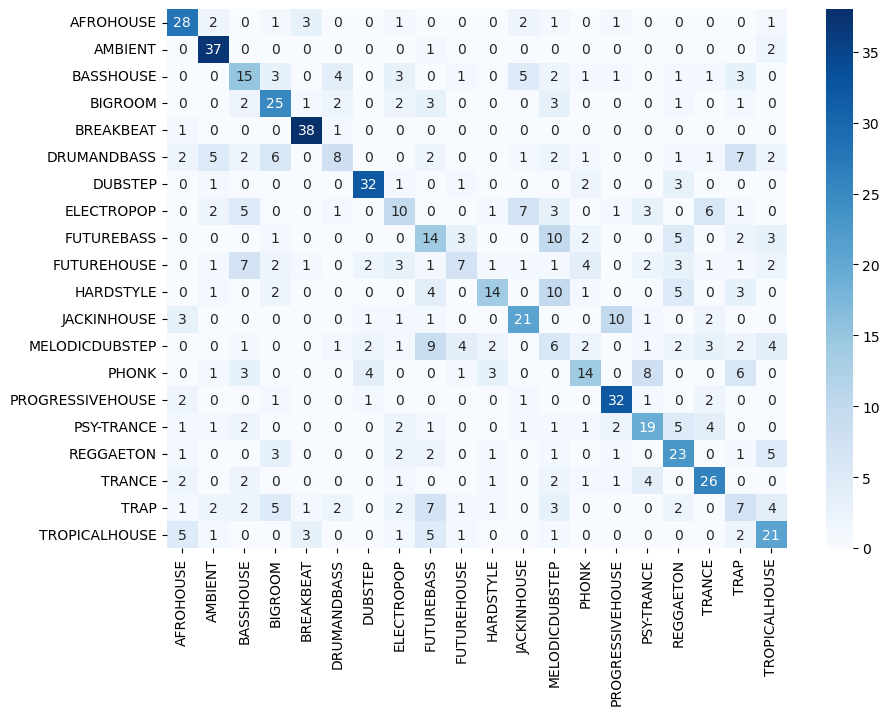

In [30]:
conf_matrix = confusion_matrix(ytest, ypredict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]